# Example of reading a Zemax file with circular aperture

In [1]:
import matplotlib.pyplot as plt
from optiland.fileio import load_zemax_file
from optiland.analysis import SpotDiagram

This example is based on the sample file "Wide angle 100 degree field.zmx" provided by Zemax.

In [2]:
lenses ={}
lenses["without aperture"] = load_zemax_file(r"../../../tests/zemax_files/circular_aperture_example_without_aperture.zmx")
lenses["with aperture"] = load_zemax_file(r"../../../tests/zemax_files/circular_aperture_example_with_aperture.zmx")

for lens in lenses.values():
    lens.set_ray_aiming(mode="robust", max_iter=10, tol=1e-6, cache=True)  

Note on the layouts below that not all rays reach the imaging plane due to the presence of a cicular pupil before the stop.

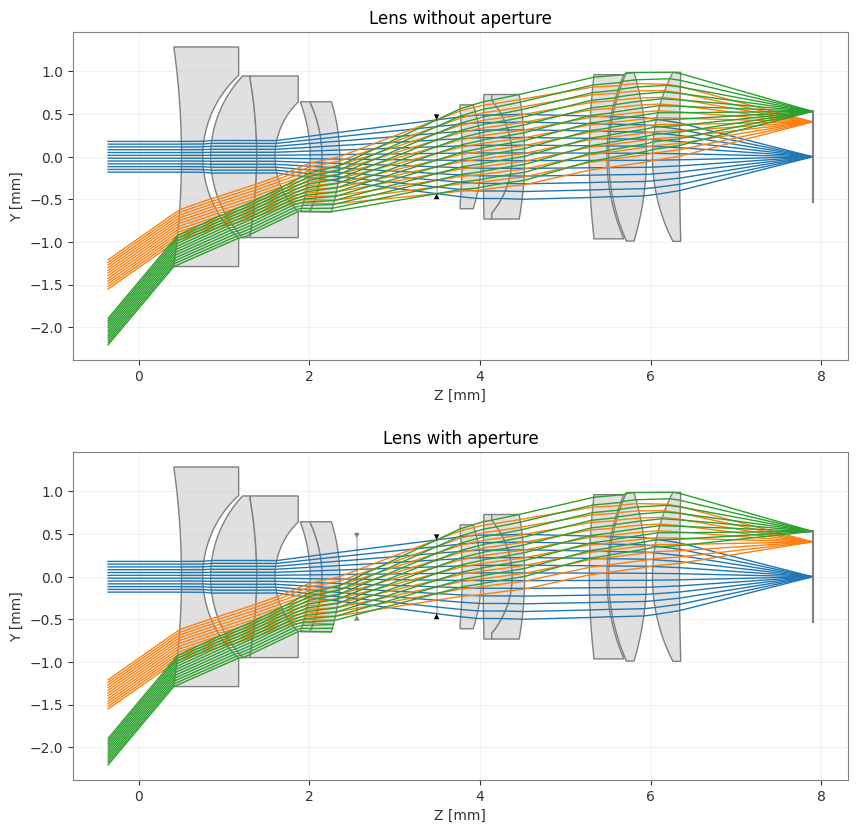

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for ax, (name, lens) in zip(axes, lenses.items()):
    lens.draw(ax=ax, num_rays=12)
    ax.set_title(f"Lens {name}")

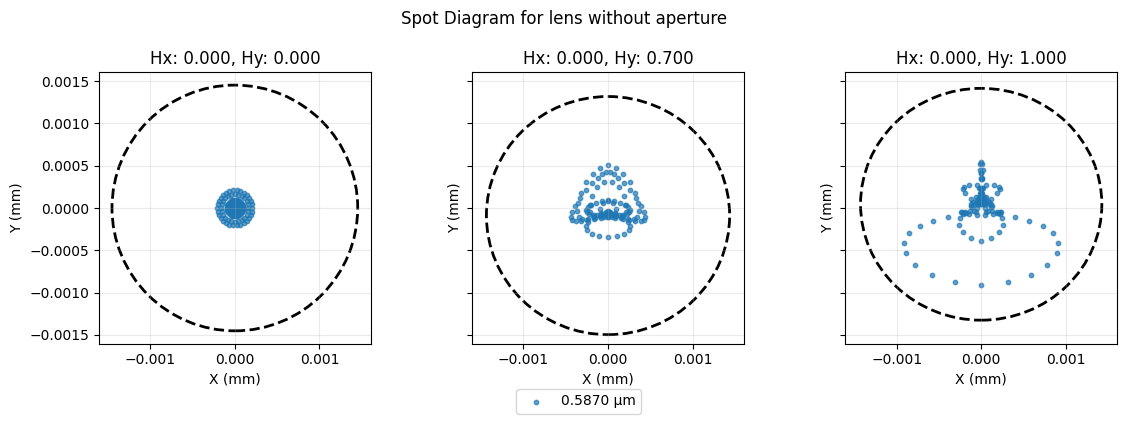

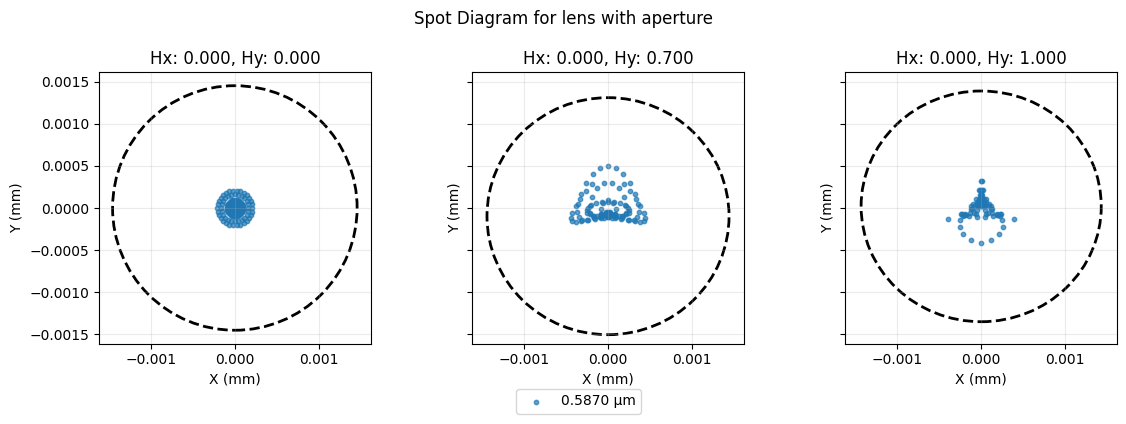

In [17]:
# RMS Spot Size Analysis
for name, lens in lenses.items():
    spot_diagram = SpotDiagram(lens)
    fig, axes = spot_diagram.view(add_airy_disk=True)
    fig.suptitle(f"Spot Diagram for lens {name}")
    fig.tight_layout()

# Example of removing vignetted rays from the optical layout

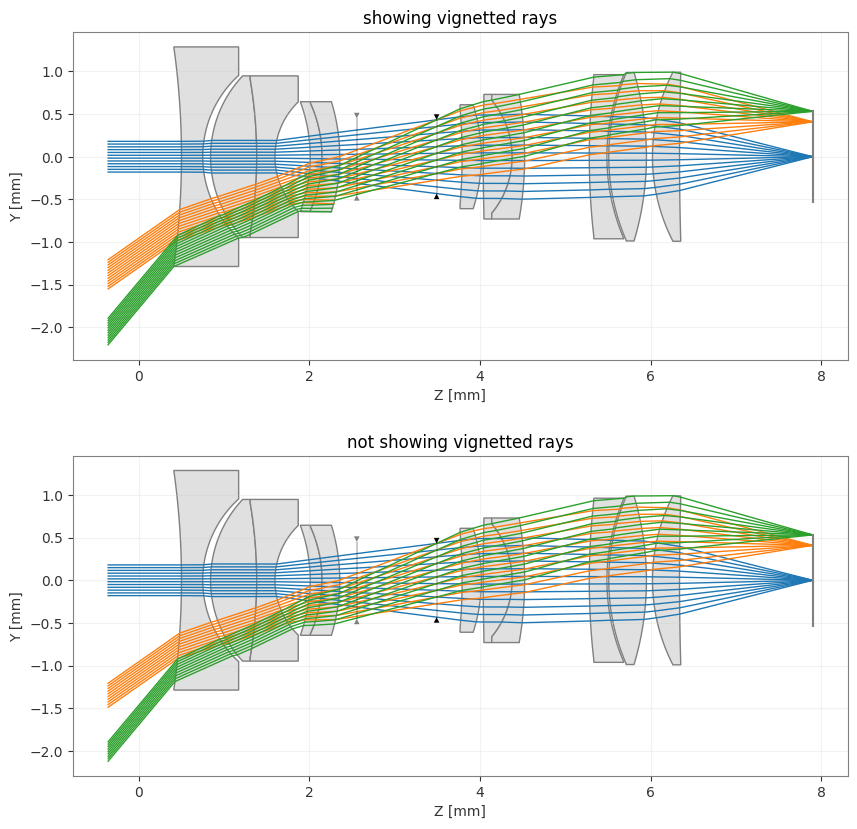

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for ax, hide_vignetted in zip(axes, [False, True]):
    lenses["with aperture"].draw(ax=ax, num_rays=12, hide_vignetted=hide_vignetted)
    ax.set_title(f"{'not showing vignetted rays' if hide_vignetted else 'showing vignetted rays'}")